<a href="https://colab.research.google.com/github/ljs7463/CSAI_assignment/blob/main/n221a_decision_trees_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 28.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.5MB/s 


In [ ]:
pip install -U pandas-profiling

     |████████████████████████████████| 256kB 3.9MB/s 
     |████████████████████████████████| 10.1MB 19.0MB/s 
     |████████████████████████████████| 645kB 40.8MB/s 
     |████████████████████████████████| 3.1MB 39.7MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 112kB 44.3MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 1.1MB 35.7MB/s 
     |████████████████████████████████| 296kB 36.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=e3acb4e6fb60a9439dc8b904c508573653915b96cfc9b82ef8ef667b30f15162
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=da29e1172b41ca20e6a6837a69760f8deb40ddff3ffdd1531cb3850765147151
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d856

In [ ]:
pip install delayed

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 


1) 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# feature, target지정
target = 'vacc_h1n1_f'

# train과  test셋 불러오기
train = pd.merge(pd.read_csv('/content/train.csv'), pd.read_csv('/content/train_labels.csv')[target], left_index = True, right_index=True)
test = pd.read_csv('/content/test.csv')



# train과 valid셋 으로 분할
train, val = train_test_split(train, test_size = 0.2, \
                                                  stratify = train[target],random_state = 2)
train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33723 entries, 20365 to 30904
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26933 non-null  float64
 1   h1n1_knowledge               26933 non-null  float64
 2   behavioral_antiviral_meds    26853 non-null  float64
 3   behavioral_avoidance         26731 non-null  float64
 4   behavioral_face_mask         26913 non-null  float64
 5   behavioral_wash_hands        26894 non-null  float64
 6   behavioral_large_gatherings  26866 non-null  float64
 7   behavioral_outside_home      26851 non-null  float64
 8   behavioral_touch_face        26795 non-null  float64
 9   doctor_recc_h1n1             32235 non-null  float64
 10  doctor_recc_seasonal         32235 non-null  float64
 11  chronic_med_condition        32648 non-null  float64
 12  child_under_6_months         26106 non-null  float64
 13  health_insur

In [ ]:
train.isnull().sum()

h1n1_concern                    6790
h1n1_knowledge                  6790
behavioral_antiviral_meds       6870
behavioral_avoidance            6992
behavioral_face_mask            6810
behavioral_wash_hands           6829
behavioral_large_gatherings     6857
behavioral_outside_home         6872
behavioral_touch_face           6928
doctor_recc_h1n1                1488
doctor_recc_seasonal            1488
chronic_med_condition           1075
child_under_6_months            7617
health_insurance               15505
health_worker                   7603
opinion_h1n1_vacc_effective     7086
opinion_h1n1_risk               7121
opinion_h1n1_sick_from_vacc     7155
opinion_seas_vacc_effective     7204
opinion_seas_risk               7257
opinion_seas_sick_from_vacc     7310
agegrp                             0
education_comp                  8183
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                         8199
r

In [ ]:
# 타겟의 비율을 통한 기준모델 
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

In [ ]:
# 범주형 데이터중 카디널리티가 많은 데이터 확인하기
train.describe(exclude='number')

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,agegrp,employment_status,census_msa,employment_industry,employment_occupation,state
count,26637,26602,26568,26519,26466,26413,33723,25466,33723,13714,13714,33723
unique,6,6,6,6,6,6,7,3,3,23,25,51
top,Somewhat Effective,Somewhat Low,Not Very Worried,Somewhat Effective,Somewhat Low,Not At All Worried,65+ Years,Employed,"MSA, Not Principle City",Health Care and Social Assistance Industries,Management Occupations,CALIFORNIA
freq,11710,9980,9229,11571,9057,11813,6821,13722,15202,2451,1769,829


In [ ]:
def engineer(df):
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist() # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]

    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)

    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)
    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

In [ ]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_insurance,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,agegrp,education_comp,raceeth4_i,sex_i,inc_pov,marital,rent_own_r,census_region,census_msa,n_adult_r,household_children,n_people_r,hhs_region,vacc_h1n1_f,behaviorals
20365,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,Somewhat Effective,Somewhat Low,Not At All Worried,18 - 34 Years,4.0,3,1,1,2.0,1.0,1,"MSA, Not Principle City",4.0,0.0,4.0,2,0,0.0
29138,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,Somewhat Effective,Somewhat High,Not Very Worried,35 - 44 Years,2.0,3,2,3,2.0,2.0,2,Non-MSA,2.0,2.0,4.0,7,1,5.0
36128,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Not Very Effective,Very Low,Dont Know,65+ Years,1.0,3,2,2,2.0,1.0,4,"MSA, Not Principle City",1.0,0.0,1.0,10,0,4.0
39793,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Very Effective,Somewhat Low,Not Very Worried,55 - 64 Years,4.0,3,1,1,1.0,1.0,2,"MSA, Principle City",2.0,0.0,2.0,7,0,3.0
32973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Not At All Effective,Somewhat Low,Not At All Worried,18 - 34 Years,4.0,3,2,2,1.0,1.0,2,Non-MSA,2.0,3.0,5.0,7,0,0.0


In [ ]:
# features 생성하기 
features = train.drop(columns=[target]).columns

# train/ test/ validation 데이터를 feature와 target으로 분리한다.
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
# 파이프라인 생성및 적용
pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe.fit(X_train, y_train)

print('검증세트 정확도', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증세트 정확도 0.8185268651405527


### 2) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
OneHotEncoder(use_cat_names=True),  
SimpleImputer(), 
DecisionTreeClassifier(max_leaf_nodes=70, min_samples_leaf= 10,max_depth=7,criterion='entropy', random_state=2))

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  0.8281884767072918
검증 정확도:  0.8287273158581425


In [ ]:
#f1 score
from sklearn.metrics import f1_score
predict = pipe.predict(X_val)
f1=f1_score(y_val, predict)

print("F1 score: {}" .format(f1))

F1 score: 0.54676710608914


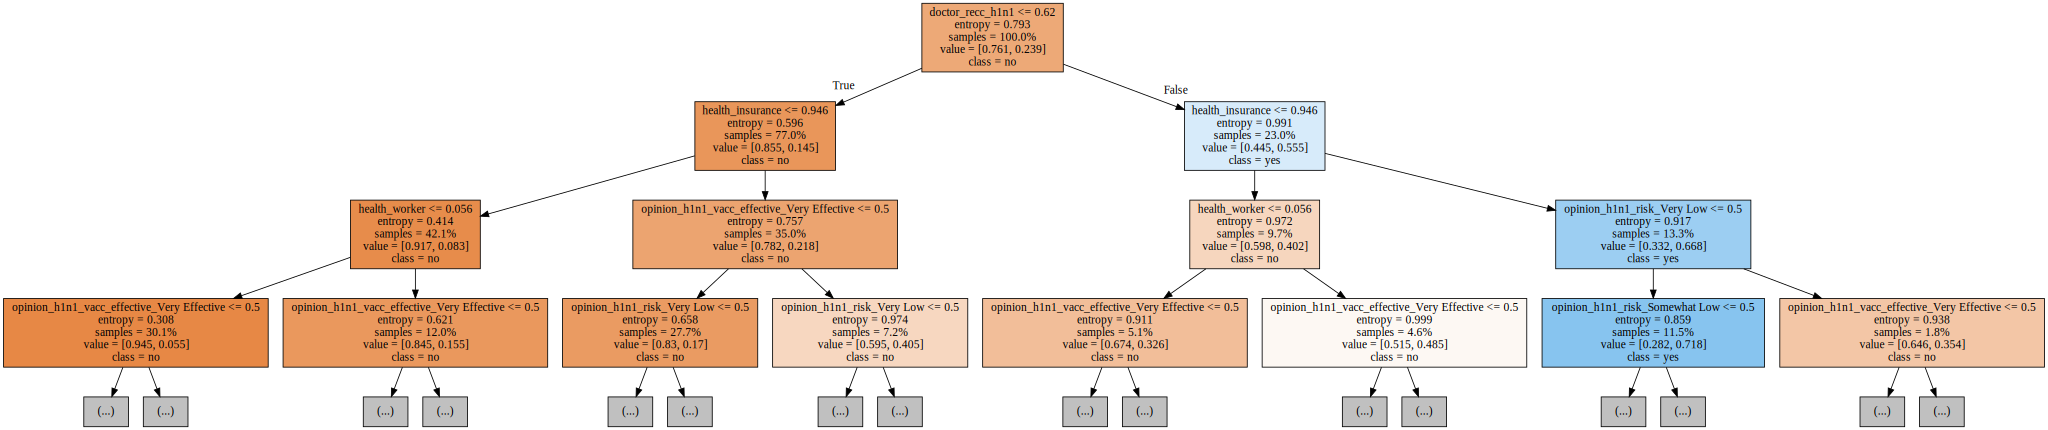

In [ ]:
# graphviz 설치방법: conda install -c conda-forge python-graphviz
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

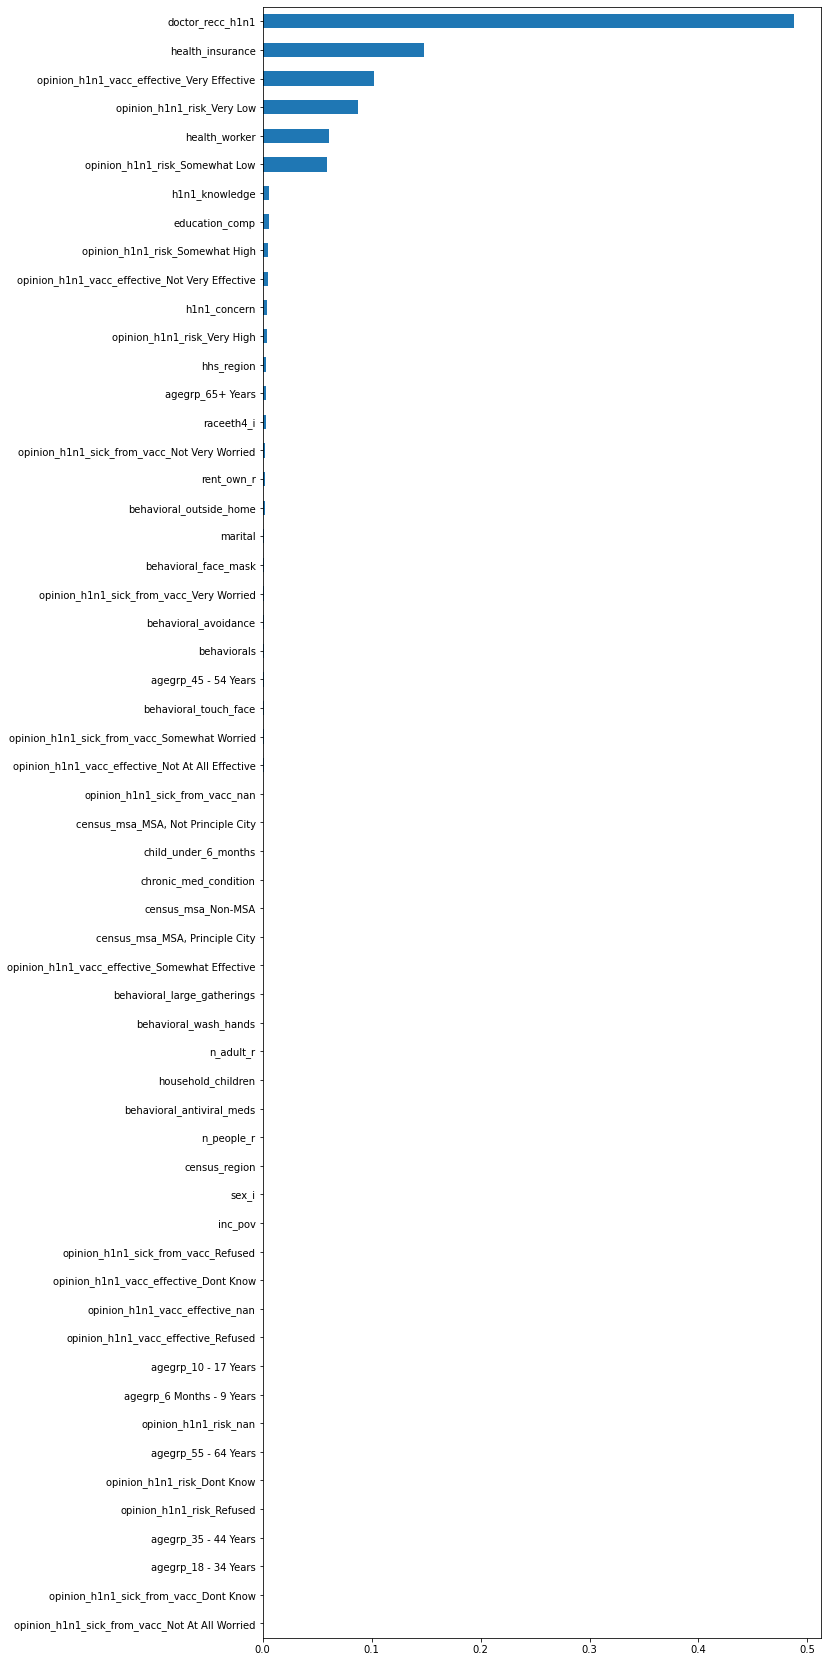

In [ ]:
# 특성중요도 시각화
import matplotlib.pyplot as plt

model_dt = pipe.named_steps['decisiontreeclassifier']
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

### 3) 

In [ ]:
# 예측값 저장하기
predict = pipe.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 제출파일 불러오기
submission = pd.read_csv('/content/submission.csv')
submission

,Id,vacc_h1n1_f
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
28099,28099,0
28100,28100,1
28101,28101,1
28102,28102,0


In [ ]:
# 예측값 덮어씌우기
submission['vacc_h1n1_f'] = predict
submission

,Id,vacc_h1n1_f
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
28099,28099,0
28100,28100,0
28101,28101,0
28102,28102,0


In [ ]:
# 파일내보내기 
submission.to_csv('submission.csv',index = False) #index제외 

### 4)